# KMeans

Kmeans es una tecnica de agrupamiento no supervisado que divide datos en grupos tambien llamados clusters, sin necesidad de etiquetas previas. El objetivo de este allgoritmo es agrupar datos similares en k grupos definidos por el usuario.
Se centra en la idea de minimizar la distancia entre los puntos de datos y el centroide del grupo al que pertenece.

# Modelo matematico

El objetivo del algoritmo KMeans es minimizar la suma de los errores cuadráticos dentro de los clusters (también conocida como inertia). Formalmente, el problema se define como:

Donde:
- k: número de clusters.
- S=\{ S_1,S_2,...,S_k\} : partición del conjunto de datos en k clusters.
- mu _i: centroide del cluster S_i, calculado como el promedio de los puntos en S_i.
-|| x- mu_i\||^2: distancia euclidiana al cuadrado entre un punto x y su centroide.


# Codigo

Preprocesamiento

Promedio:
 7        4.443144
0        0.000000
0.1      0.000000
0.2      0.000000
0.3      0.000000
           ...   
0.663    0.000000
0.664    0.000000
0.665    0.000000
0.666    0.000000
0.667    0.000000
Length: 785, dtype: float64
Desviación estándar:
 7        2.895897
0        0.000000
0.1      0.000000
0.2      0.000000
0.3      0.000000
           ...   
0.663    0.000000
0.664    0.000000
0.665    0.000000
0.666    0.000000
0.667    0.000000
Length: 785, dtype: float64
Máximo:
 7        9
0        0
0.1      0
0.2      0
0.3      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Length: 785, dtype: int64
Mínimo:
 7        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Length: 785, dtype: int64


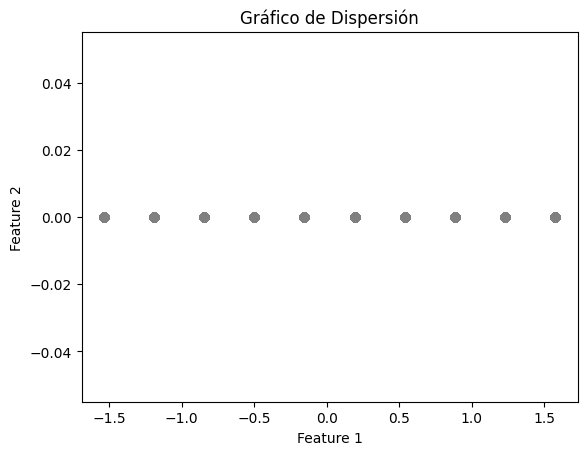

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar dataset
df = pd.read_csv("sample_data/mnist_test.csv")

# Estadísticas básicas
print("Promedio:\n", df.mean())
print("Desviación estándar:\n", df.std())
print("Máximo:\n", df.max())
print("Mínimo:\n", df.min())

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Gráfico de dispersión
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray')
plt.title("Gráfico de Dispersión")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Prediccion

In [2]:
from sklearn.cluster import KMeans

# Entrenar modelo
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Función de predicción
def predict_cluster(pattern):
    pattern_scaled = scaler.transform([pattern])
    cluster = kmeans.predict(pattern_scaled)
    print(f"El patrón pertenece al cluster: {cluster[0]}")
    return cluster[0]

# Ejemplo
predict_cluster([0.5, -1.2])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but StandardScaler is expecting 785 features as input.

Evaluacion

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Supongamos que tienes etiquetas verdaderas
true_labels = pd.read_csv("sample_data/mnist_test.csv")  #Cambiar por dataset
predicted_labels = kmeans.predict(X_scaled)

# Matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)
print("Matriz de Confusión:\n", cm)

# Accuracy
acc = accuracy_score(true_labels, predicted_labels)
print(f"Precisión del modelo: {acc:.2f}")

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

# Iris

Promedio:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
Desviación estándar:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64
Máximo:
 sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64
Mínimo:
 sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64


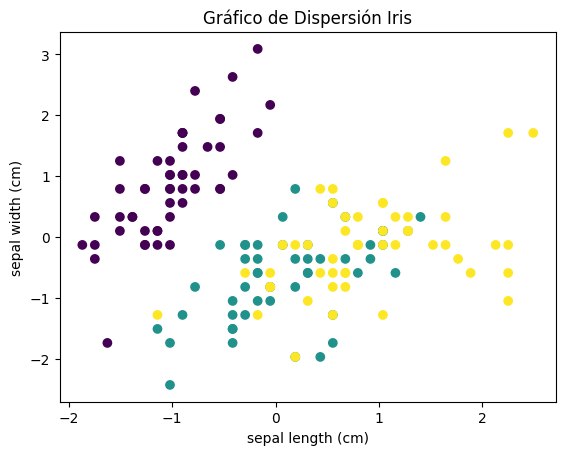

In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Estadísticas básicas
df = pd.DataFrame(X, columns=feature_names)
print("Promedio:\n", df.mean())
print("Desviación estándar:\n", df.std())
print("Máximo:\n", df.max())
print("Mínimo:\n", df.min())

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gráfico de dispersión (usamos dos características para visualizar)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.title("Gráfico de Dispersión Iris")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

In [6]:
from sklearn.cluster import KMeans

# Entrenar modelo K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Función para predecir el cluster de un nuevo patrón
def predict_cluster(pattern):
    pattern_scaled = scaler.transform([pattern])
    cluster = kmeans.predict(pattern_scaled)
    print(f"El patrón pertenece al cluster: {cluster[0]}")
    return cluster[0]

# Ejemplo
predict_cluster([5.1, 3.5, 1.4, 0.2])

El patrón pertenece al cluster: 1


np.int32(1)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predicciones del modelo
predicted_labels = kmeans.predict(X_scaled)

# Matriz de confusión
cm = confusion_matrix(y, predicted_labels)
print("Matriz de Confusión:\n", cm)

# Accuracy
acc = accuracy_score(y, predicted_labels)
print(f"Precisión del modelo: {acc:.2f}")

Matriz de Confusión:
 [[ 0 33 17]
 [46  0  4]
 [50  0  0]]
Precisión del modelo: 0.00


# Referencias


Arthur, D., & Vassilvitskii, S. (2007). k-means++: The advantages of careful seeding. Proceedings of the Eighteenth Annual ACM-SIAM Symposium on Discrete Algorithms, 1027–1035. https://doi.org/10.1145/1283383.1283494

IBM. (n.d.). K-means clustering. IBM Cloud Learn Hub. https://www.ibm.com/cloud/learn/k-means-clustering